In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/media/prince/5A4E832F4E83034D/Movie recomender/movies.csv')
df.columns.tolist()

['id',
 'title',
 'genre',
 'original_language',
 'overview',
 'popularity',
 'release_date',
 'vote_average',
 'vote_count']

In [26]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 9999 non-null   int64         
 1   title              9999 non-null   object        
 2   genre              9999 non-null   object        
 3   original_language  9999 non-null   object        
 4   overview           9999 non-null   object        
 5   popularity         9999 non-null   float64       
 6   release_date       9999 non-null   datetime64[ns]
 7   vote_average       9999 non-null   float64       
 8   vote_count         9999 non-null   int64         
 9   popularity_bin     9999 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.0+ MB


In [4]:
df.describe()

,id,popularity,vote_average,vote_count
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,161243.505000,34.697267,6.621150,1547.309400
std,211422.046043,211.684175,0.766231,2648.295789
min,5.000000,0.600000,4.600000,200.000000
25%,10127.750000,9.154750,6.100000,315.000000
50%,30002.500000,13.637500,6.600000,583.500000
75%,310133.500000,25.651250,7.200000,1460.000000
max,934761.000000,10436.917000,8.700000,31917.000000


In [5]:
(df['vote_count'] >= 300).sum()

np.int64(7735)

In [6]:
mask = df['overview'].isnull() | df['genre'].isnull()

df[mask]

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
3361,50472,Anplagghed al cinema,NaN,it,"A queue at the ATM machine, a displaced family...",4.420,2006-11-26,7.0,313
4150,38537,Nati stanchi,Comedy,it,NaN,5.671,2002-03-01,6.8,211
6973,31359,Would I Lie to You? 2,Comedy,fr,NaN,4.741,2001-02-07,6.2,325
7821,43211,7 Kilos in 7 Days,NaN,it,Two not very clever young doctors open a fitne...,5.885,1986-02-02,6.0,212
7941,2029,Tanguy,Comedy,fr,NaN,5.449,2001-11-21,6.0,387
8518,57114,"Amore, bugie e calcetto",NaN,en,NaN,4.709,2008-04-04,5.8,200
9293,17413,Incognito,Comedy,fr,NaN,5.602,2009-04-28,5.5,213
9440,516043,Arrivano i prof,Comedy,it,NaN,6.558,2018-05-01,5.4,337
9620,154512,Lightning Strike,Comedy,it,NaN,4.070,2012-12-13,5.3,216
9792,42426,A spasso nel tempo - L'avventura continua,"Comedy,Fantasy",it,NaN,5.020,1997-12-11,5.1,209


In [7]:
df.dropna(subset=['overview', 'genre'], how='all', inplace=True)

In [8]:
df[['genre','overview']].isnull().sum()

genre        2
overview    12
dtype: int64

In [9]:
df['genre'].fillna('Unknown', inplace=True)
df['overview'].fillna(' ', inplace=True)

/tmp/ipykernel_4944/3723141806.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genre'].fillna('Unknown', inplace=True)
/tmp/ipykernel_4944/3723141806.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [10]:
df.shape

(9999, 9)

In [11]:
df.head()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811


In [12]:
df['popularity'].max()

10436.917

In [13]:
df['popularity'].min()

0.6

In [14]:
df.loc[df['popularity'].idxmin()]

id                                                               12477
title                                           Grave of the Fireflies
genre                                              Animation,Drama,War
original_language                                                   ja
overview             In the final months of World War II, 14-year-o...
popularity                                                         0.6
release_date                                                1988-04-16
vote_average                                                       8.4
vote_count                                                        4217
Name: 31, dtype: object

In [15]:
df.loc[df['popularity'].idxmax()]

id                                                              507086
title                                          Jurassic World Dominion
genre                                 Adventure,Action,Science Fiction
original_language                                                   en
overview             Four years after Isla Nublar was destroyed, di...
popularity                                                   10436.917
release_date                                                2022-06-01
vote_average                                                       7.0
vote_count                                                        2054
Name: 3066, dtype: object

In [16]:
df.describe()

,id,popularity,vote_average,vote_count
count,9999.000000,9999.000000,9999.000000,9999.000000
mean,161253.918992,34.700266,6.621232,1547.444144
std,211430.054048,211.694548,0.766226,2648.393946
min,5.000000,0.600000,4.600000,200.000000
25%,10127.500000,9.155500,6.100000,315.000000
50%,29987.000000,13.638000,6.600000,584.000000
75%,310134.000000,25.651500,7.200000,1460.000000
max,934761.000000,10436.917000,8.700000,31917.000000


In [17]:
# Assuming df['popularity'] exists
df['popularity_bin'] = pd.qcut(df['popularity'], q=10, labels=range(1,11))


In [18]:
df.head()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count,popularity_bin
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862,10
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731,8
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280,10
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959,9
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811,10


In [19]:
df[['popularity', 'popularity_bin']].tail()

,popularity,popularity_bin
9995,98.322,10
9996,12.490,5
9997,18.333,7
9998,15.159,6
9999,16.482,6


In [20]:
df['popularity_bin'].value_counts()

popularity_bin
2     1001
1     1000
3     1000
5     1000
8     1000
7     1000
9     1000
10    1000
6      999
4      999
Name: count, dtype: int64

In [28]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce', inplace=True)
df.to_csv('movies_preprocessed.csv', index=False)

TypeError: to_datetime() got an unexpected keyword argument 'inplace'

In [29]:
df.head()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count,popularity_bin
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862,10
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731,8
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280,10
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959,9
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811,10


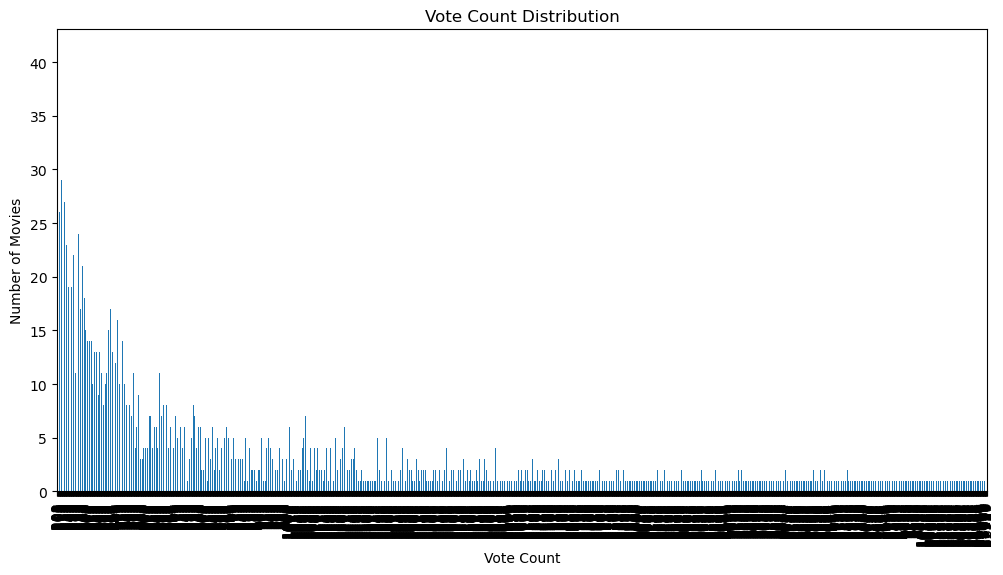

In [30]:
# Simple bar plot
df['vote_count'].value_counts().sort_index().plot(kind='bar', figsize=(12,6))

plt.title('Vote Count Distribution')
plt.xlabel('Vote Count')
plt.ylabel('Number of Movies')
plt.show()